In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
Hobbit_sentiments=pd.read_csv(r'C:\Users\Nick\Desktop\GitProjects\NLP_projects\The_Hobbit\Hobbit_sentiments.csv')
Hobbit_sentiments=Hobbit_sentiments.drop(columns=['Unnamed: 0'])
Hobbit_sentiments.head()

,Chapters,Text,Total_words,Lex_density,Lex_density_norm,Negative,Neutral,Positive,Compound,Rating,Polarity,Subjectivity,Positive_NRC,Negative_NRC,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust,word_count,Rating_num
0,AN UNEXPECTED PARTY,Chapter I AN UNEXPECTED PARTY In a hole...,47620,0.190665,0.190665,0.046048,0.858940,0.095017,0.125155,Positive,0.061535,0.391206,0.032885,0.020481,0.007885,0.023173,0.006635,0.014615,0.015288,0.011442,0.011058,0.021731,10400,1
1,ROAST MUTTON,"Chapter II ROAST MUTTON Up jumped Bilbo,...",28863,0.229236,0.229236,0.063258,0.874296,0.062453,0.004399,Neutral,0.047677,0.319128,0.025407,0.025407,0.015027,0.018435,0.008366,0.015182,0.013323,0.006507,0.010225,0.015957,6455,0
2,A SHORT REST,Chapter III A SHORT REST They did not si...,15671,0.275179,0.275179,0.035789,0.849283,0.114947,0.136103,Positive,0.098664,0.358846,0.039481,0.017973,0.010018,0.025928,0.008250,0.010018,0.020919,0.010018,0.013848,0.023866,3394,1
3,OVER HILL AND UNDER HILL,Chapter IV OVER HILL AND UNDER HILL Ther...,22684,0.256335,0.256335,0.082478,0.848184,0.069357,-0.034112,Neutral,0.004561,0.389319,0.028157,0.047489,0.019962,0.020382,0.016810,0.029838,0.012398,0.017861,0.014499,0.016180,4759,0
4,RIDDLES IN THE DARK,Chapter V RIDDLES IN THE DARK When Bilbo...,38059,0.181741,0.181741,0.103889,0.824226,0.071892,-0.043253,Neutral,-0.006902,0.339751,0.022706,0.035748,0.014905,0.020028,0.008850,0.018631,0.011295,0.014788,0.018864,0.011877,8588,0


In [3]:
Hobbit_sentiments.describe()

,Total_words,Lex_density,Lex_density_norm,Negative,Neutral,Positive,Compound,Polarity,Subjectivity,Positive_NRC,Negative_NRC,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust,word_count,Rating_num
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,27455.105263,0.245604,0.245604,0.069074,0.852704,0.077757,0.034421,0.044796,0.359235,0.034327,0.027866,0.011749,0.023843,0.008194,0.017871,0.014481,0.013448,0.012709,0.020472,5910.736842,0.368421
std,13195.816075,0.046599,0.046599,0.018052,0.018881,0.017492,0.066416,0.033889,0.035583,0.006734,0.007548,0.003937,0.002814,0.004252,0.005580,0.003880,0.003308,0.002938,0.003472,2871.485791,0.597265
min,11453.000000,0.171966,0.171966,0.035789,0.816149,0.050610,-0.067713,-0.006902,0.288025,0.022706,0.017973,0.007357,0.018435,0.003229,0.009639,0.007784,0.006507,0.007157,0.011877,2607.000000,-1.000000
25%,17081.500000,0.207357,0.207357,0.057560,0.842965,0.068798,-0.015764,0.015647,0.338448,0.030695,0.023131,0.008098,0.022332,0.005756,0.014841,0.012141,0.011425,0.011120,0.018742,3560.500000,0.000000
50%,21772.000000,0.257935,0.257935,0.065162,0.853004,0.074536,0.019908,0.045913,0.360175,0.033364,0.026259,0.010098,0.023459,0.007072,0.016304,0.013323,0.013081,0.012077,0.021405,4646.000000,0.000000
75%,37436.500000,0.278421,0.278421,0.082147,0.858728,0.087663,0.076650,0.067750,0.383970,0.036290,0.031972,0.014704,0.025737,0.008608,0.020215,0.016182,0.015305,0.014184,0.022243,8054.500000,1.000000
max,55336.000000,0.319428,0.319428,0.103889,0.891776,0.114947,0.164969,0.098664,0.430428,0.050602,0.047489,0.019962,0.029403,0.019144,0.029838,0.024785,0.020414,0.018864,0.027194,11765.000000,1.000000


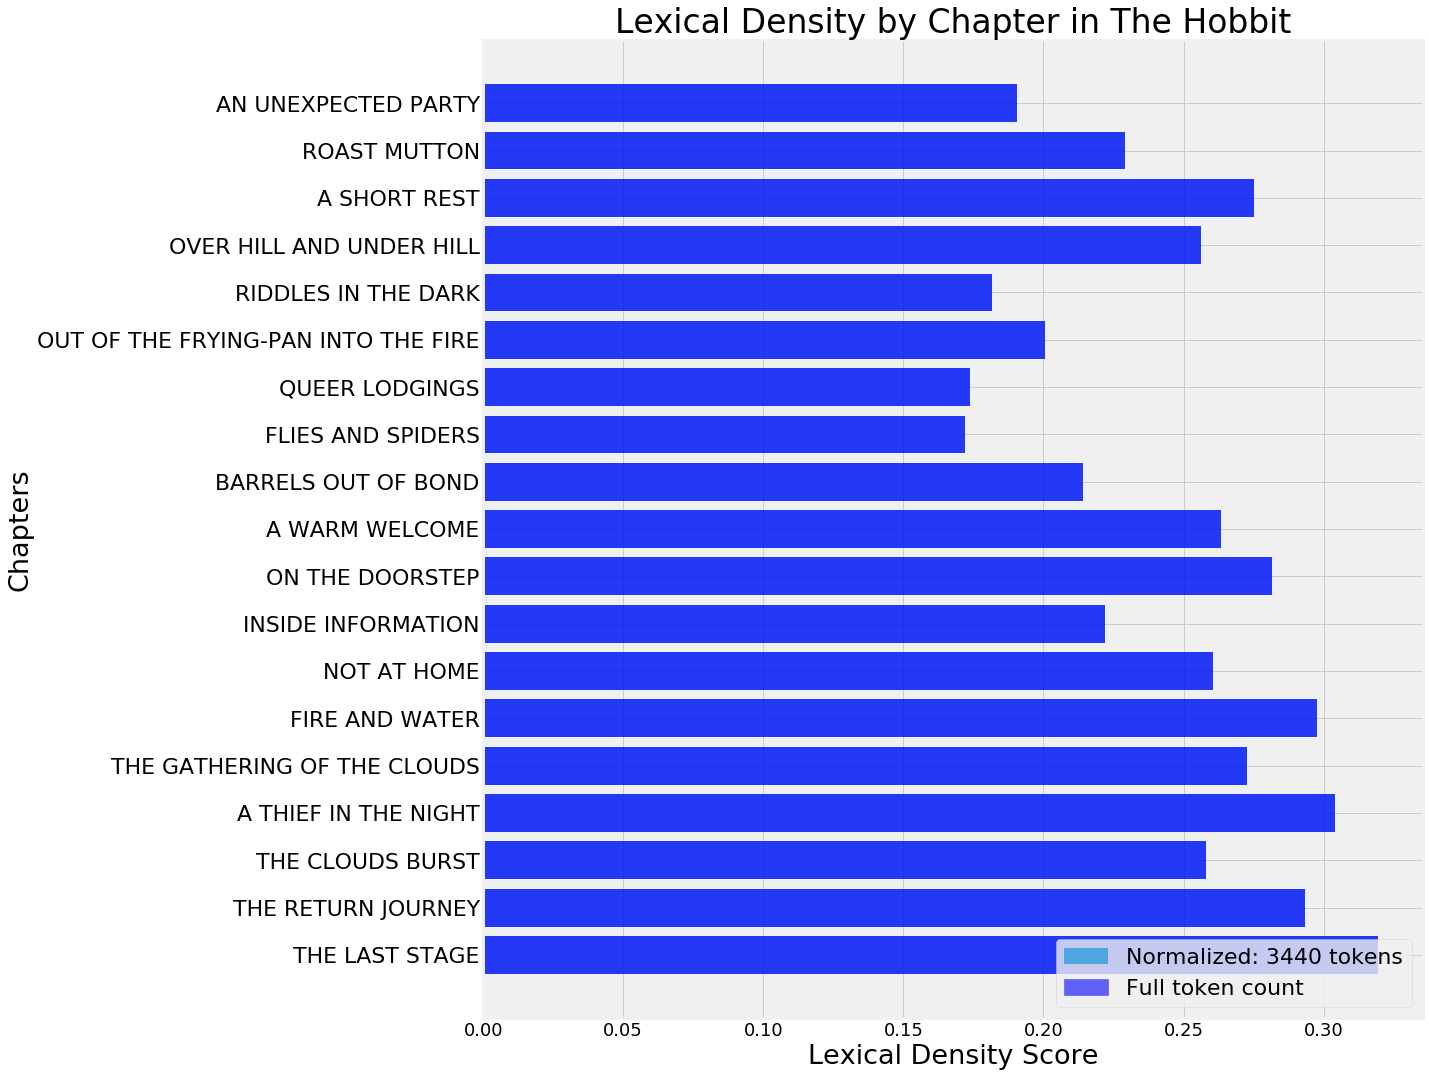

In [4]:
import matplotlib.patches as mpatches

kwargs = dict(alpha=0.6)

patch1 = mpatches.Patch(label='Normalized: 3440 tokens', **kwargs)
patch2 = mpatches.Patch(color='b', label='Full token count', **kwargs)
all_handles = (patch1, patch2)

fig, ax = plt.subplots(figsize=(15, 18))
ax.set_alpha(0.7)
ax.barh(Hobbit_sentiments['Chapters'], Hobbit_sentiments['Lex_density_norm'],alpha=.5)
ax.barh(Hobbit_sentiments['Chapters'], Hobbit_sentiments['Lex_density'],color='b',alpha=.7)
ax.set_title("Lexical Density by Chapter in The Hobbit",fontsize=33)
ax.set_xlabel("Lexical Density Score", fontsize=27)
ax.set_ylabel("Chapters", fontsize=27)
#ax.set_xticklabels([-0.15,-0.10,-0.05,0.00,0.05,0.10,0.15,0.20,0.25],fontsize=20)
ax.set_yticklabels(Hobbit_sentiments.Chapters, rotation=0, fontsize=22)
ax.legend(handles=all_handles,loc='lower right', fontsize=22)
ax.tick_params(axis='x', which='major', labelsize=18)
ax.invert_yaxis()
#plt.show()

plt.savefig(r'C:\Users\Nick\Desktop\GitProjects\NLP_projects\The_Hobbit\Hobbit_Lexical_Diversity.png',bbox_inches='tight')

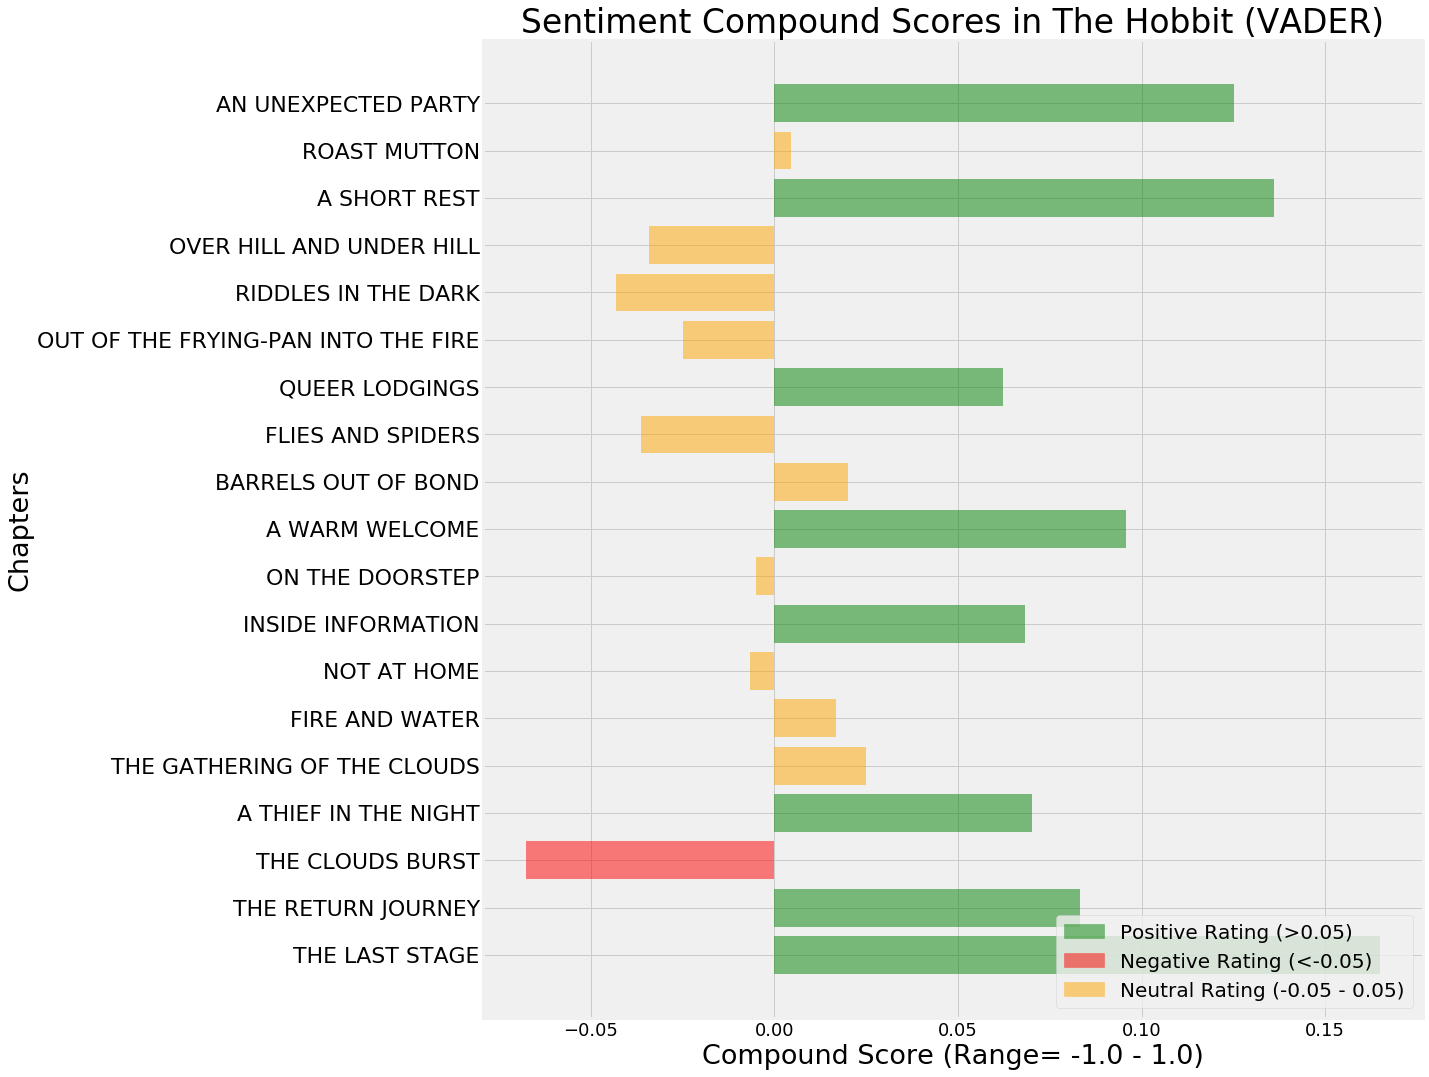

In [5]:
import matplotlib.patches as mpatches

kwargs = dict(alpha=0.5)

patch1 = mpatches.Patch(color='g', label='Positive Rating (>0.05)', **kwargs)
patch2 = mpatches.Patch(color='r', label='Negative Rating (<-0.05)', **kwargs)
patch3 = mpatches.Patch(color='orange', label='Neutral Rating (-0.05 - 0.05)', **kwargs)
all_handles = (patch1, patch2, patch3)

fig, ax = plt.subplots(figsize=(15, 18))
ax.set_alpha(0.5)
ax.barh(Hobbit_sentiments['Chapters'], Hobbit_sentiments['Compound'],
        color=Hobbit_sentiments.Rating.map({'Positive': 'g', 'Negative': 'r', 'Neutral': 'orange'}),
        alpha=.5)
ax.set_title("Sentiment Compound Scores in The Hobbit (VADER)",fontsize=33)
ax.set_xlabel("Compound Score (Range= -1.0 - 1.0)", fontsize=27)
ax.set_ylabel("Chapters", fontsize=27)
#ax.set_xticklabels([-0.15,-0.10,-0.05,0.00,0.05,0.10,0.15,0.20,0.25],fontsize=20)
ax.set_yticklabels(Hobbit_sentiments.Chapters, rotation=0, fontsize=22)
ax.legend(handles=all_handles,loc='lower right', fontsize=20)
ax.tick_params(axis='x', which='major', labelsize=18)
ax.invert_yaxis()
#plt.show()

plt.savefig(r'C:\Users\Nick\Desktop\GitProjects\NLP_projects\The_Hobbit\Hobbit_VADER_compound.png',bbox_inches='tight')

In [6]:
print ('--- Sentiment Scores for The Hobbit Averaged Across Chapters ---')
print ('\n')
print ('-- TEXT BLOB --')
print ('Polarity: {0:.3f}'.format(Hobbit_sentiments['Polarity'].mean()))
print ('Subjectivity: {0:.3f}'.format(Hobbit_sentiments['Subjectivity'].mean()))
print ('\n')
print ('-- VADER --')
print ('Positive: {0:.3f}'.format(Hobbit_sentiments['Positive'].mean()))
print ('Negative: {0:.3f}'.format(Hobbit_sentiments['Negative'].mean()))
print ('Neutral: {0:.3f}'.format(Hobbit_sentiments['Neutral'].mean()))
print ('Compound: {0:.3f}'.format(Hobbit_sentiments['Compound'].mean()))
print ('\n')
print ('-- NRC --')
print ('Positive: {0:.3f}'.format(Hobbit_sentiments['Positive_NRC'].mean()))
print ('Joy: {0:.3f}'.format(Hobbit_sentiments['Joy'].mean()))
print ('Anticipation: {0:.3f}'.format(Hobbit_sentiments['Anticipation'].mean()))
print ('Surprise: {0:.3f}'.format(Hobbit_sentiments['Surprise'].mean()))
print ('Trust: {0:.3f}'.format(Hobbit_sentiments['Trust'].mean()))
print ('Negative: {0:.3f}'.format(Hobbit_sentiments['Negative_NRC'].mean()))
print ('Anger: {0:.3f}'.format(Hobbit_sentiments['Anger'].mean()))
print ('Fear: {0:.3f}'.format(Hobbit_sentiments['Fear'].mean()))
print ('Disgust: {0:.3f}'.format(Hobbit_sentiments['Disgust'].mean()))
print ('Sadness: {0:.3f}'.format(Hobbit_sentiments['Sadness'].mean()))

--- Sentiment Scores for The Hobbit Averaged Across Chapters ---


-- TEXT BLOB --
Polarity: 0.045
Subjectivity: 0.359


-- VADER --
Positive: 0.078
Negative: 0.069
Neutral: 0.853
Compound: 0.034


-- NRC --
Positive: 0.034
Joy: 0.014
Anticipation: 0.024
Surprise: 0.013
Trust: 0.020
Negative: 0.028
Anger: 0.012
Fear: 0.018
Disgust: 0.008
Sadness: 0.013


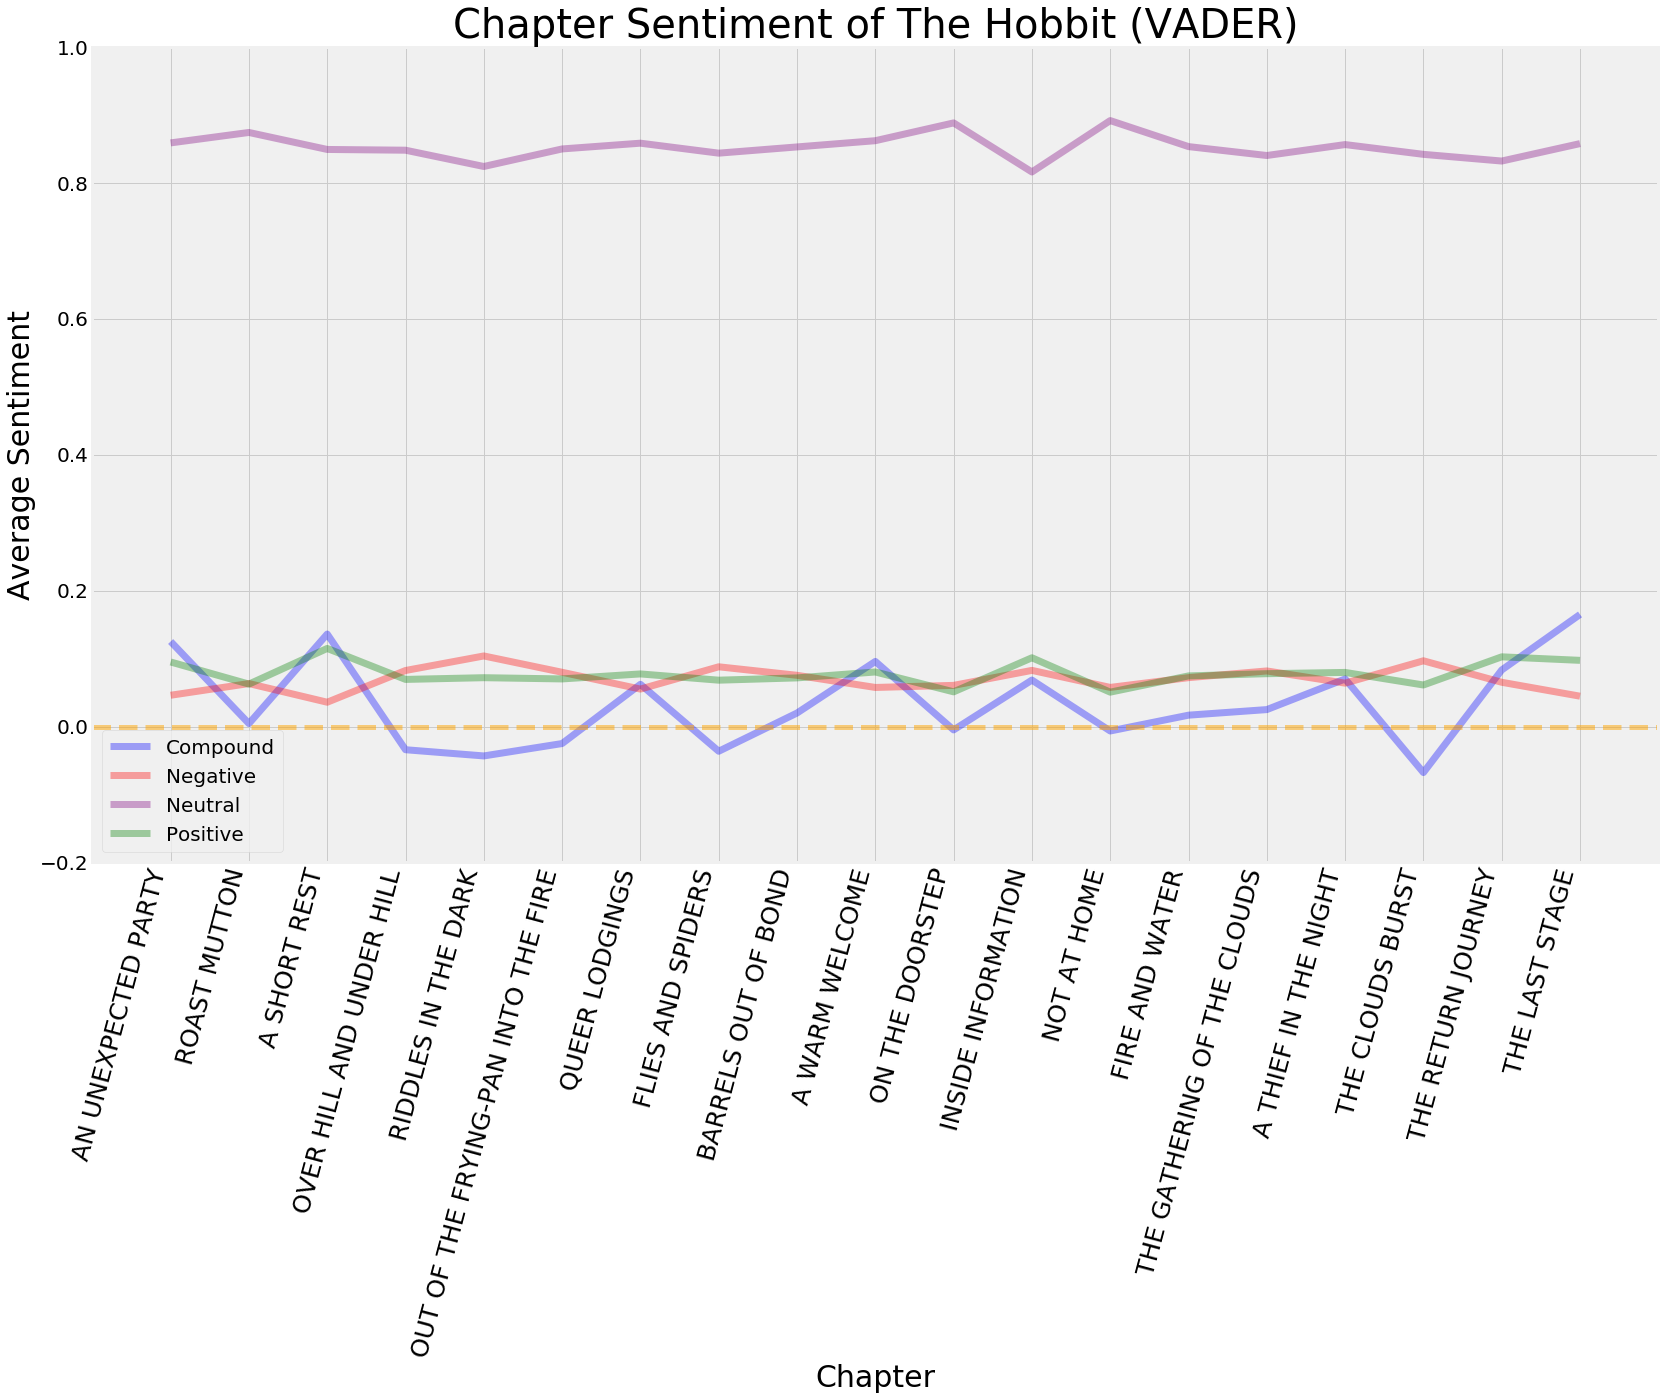

In [12]:
ax = plt.gca()
Hobbit_sentiments.plot(kind='line',x='Chapters', y='Compound',figsize=(25,15), color='blue',
                             alpha=.35, linewidth=7, ax=ax)
Hobbit_sentiments.plot(kind='line',x='Chapters', y='Negative',figsize=(25,15), color='red',
                             alpha=.35, linewidth=7, ax=ax)
Hobbit_sentiments.plot(kind='line',x='Chapters', y='Neutral',figsize=(25,15), color='purple',
                             alpha=.35, linewidth=7, ax=ax)
Hobbit_sentiments.plot(kind='line',x='Chapters', y='Positive',figsize=(25,15), color='green',
                             alpha=.35, linewidth=7, ax=ax)
plt.axhline(y=0, xmin=0, xmax=1, alpha=.5, color='orange', linestyle='--', linewidth=5)
plt.legend(loc='best', fontsize=20)
plt.title('Chapter Sentiment of The Hobbit (VADER)', fontsize=40)
plt.xlim(-1,19)
plt.ylim(-.2,1)
plt.xlabel('Chapter', fontsize=30)
plt.xticks(np.arange(19), Hobbit_sentiments.Chapters[0:19], rotation=75, ha='right',fontsize=25)
plt.yticks([-0.2,0,0.2,0.4,0.6,0.8,1.0],fontsize=20)
plt.ylabel('Average Sentiment', fontsize=30)
#plt.show()

plt.savefig(r'C:\Users\Nick\Desktop\GitProjects\NLP_projects\The_Hobbit\Hobbit_VADER_full.png',bbox_inches='tight')

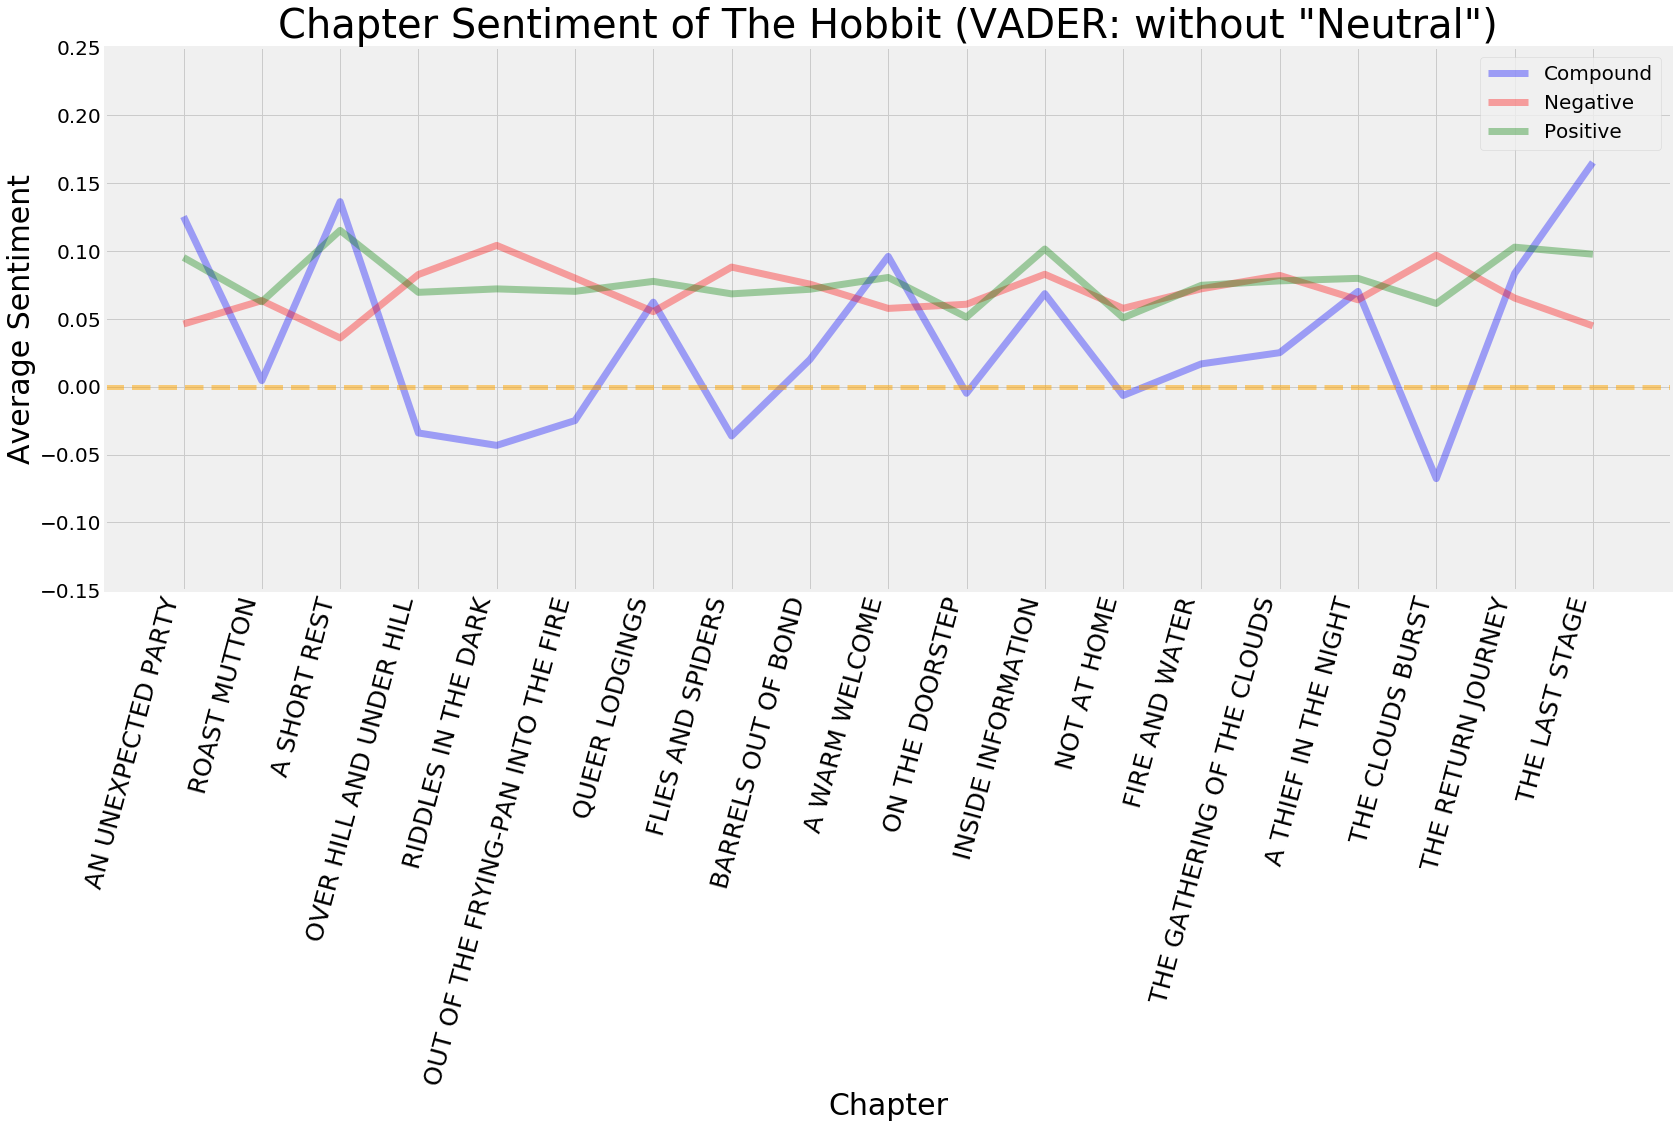

In [13]:
ax1 = plt.gca()
Hobbit_sentiments.plot(kind='line',x='Chapters', y='Compound',figsize=(25,10), color='blue',
                             alpha=.35, linewidth=7, ax=ax1)
Hobbit_sentiments.plot(kind='line',x='Chapters', y='Negative',figsize=(25,10), color='red',
                             alpha=.35, linewidth=7, ax=ax1)
Hobbit_sentiments.plot(kind='line',x='Chapters', y='Positive',figsize=(25,10), color='green',
                             alpha=.35, linewidth=7, ax=ax1)
plt.axhline(y=0, xmin=0, xmax=1, alpha=.5, color='orange', linestyle='--', linewidth=5)
plt.legend(loc='best', fontsize=20)
plt.title('Chapter Sentiment of The Hobbit (VADER: without "Neutral")', fontsize=40)
plt.xlim(-1,19)
#plt.ylim(-.5,1)
plt.xlabel('Chapter', fontsize=30)
plt.xticks(np.arange(19), Hobbit_sentiments.Chapters[0:19], rotation=75, ha='right',fontsize=25)
plt.yticks([-0.15,-0.10,-0.05,0,0.05,0.10,0.15,0.20,0.25],fontsize=20)
plt.ylabel('Average Sentiment', fontsize=30)
#plt.show()

plt.savefig(r'C:\Users\Nick\Desktop\GitProjects\NLP_projects\The_Hobbit\Hobbit_VADER_zoom.png',bbox_inches='tight')

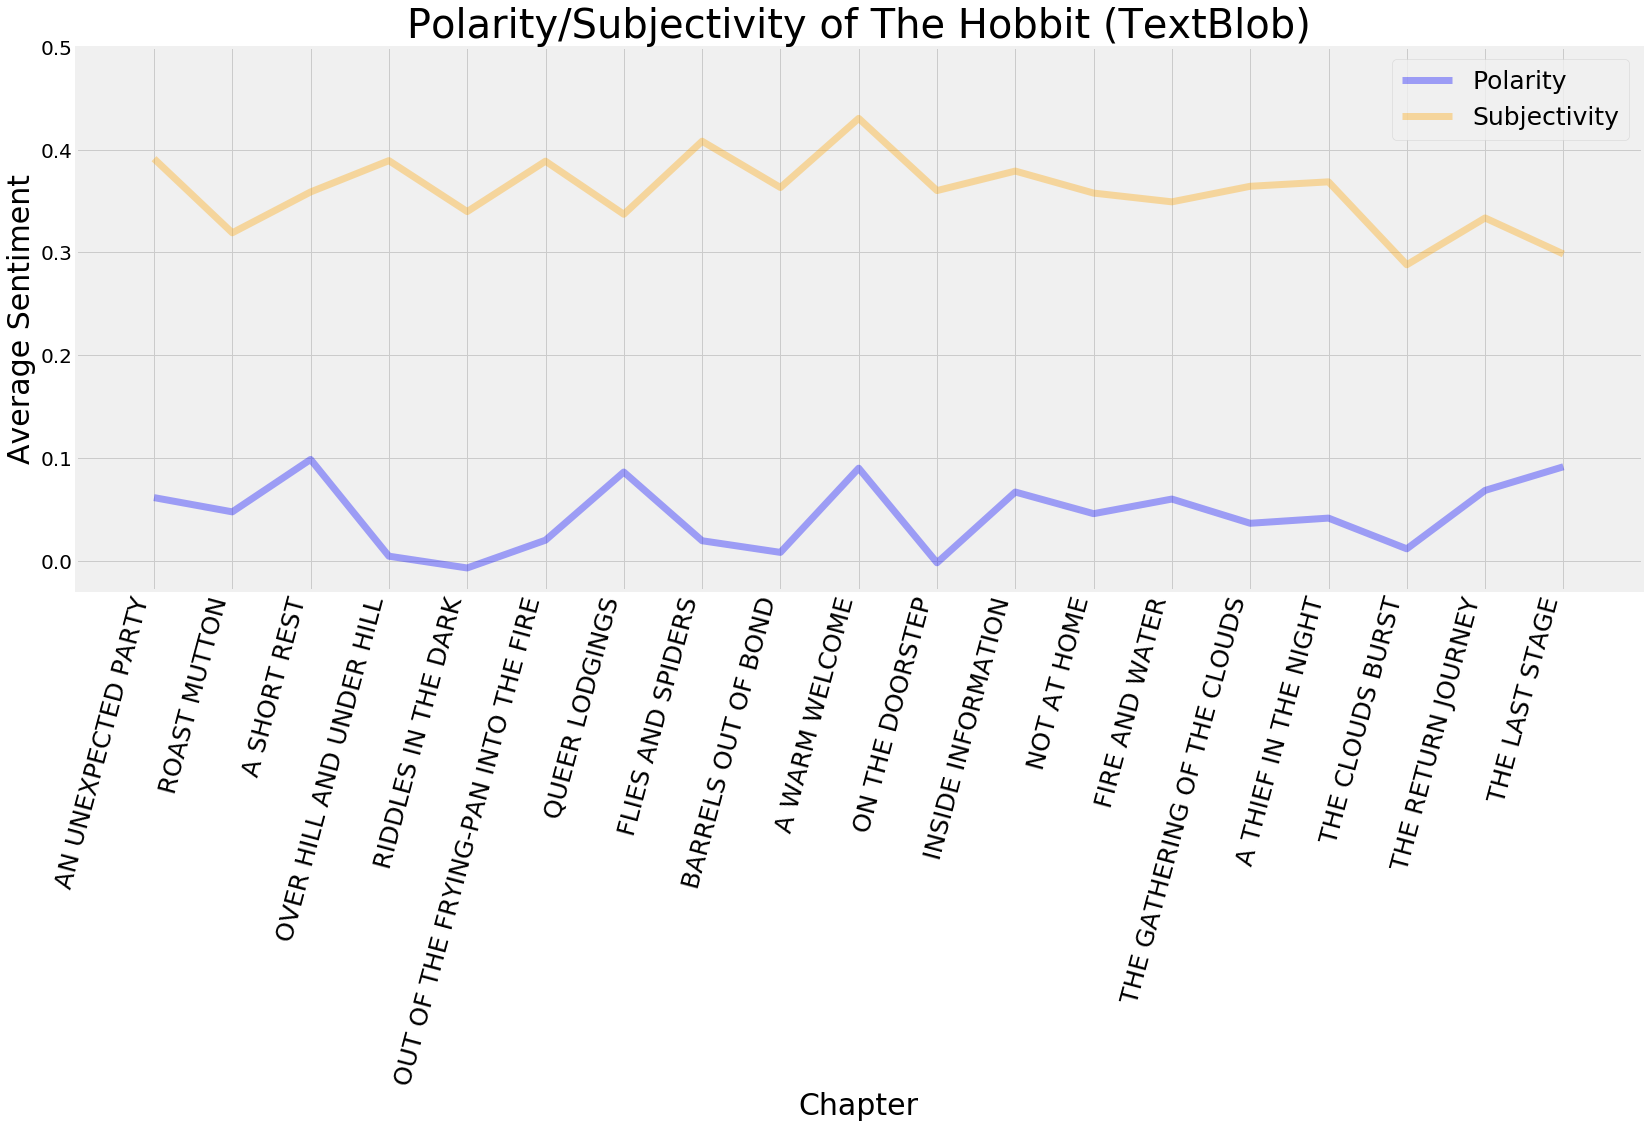

In [14]:
ax2 = plt.gca()
Hobbit_sentiments.plot(kind='line',x='Chapters', y='Polarity',figsize=(25,10), color='blue',
                             alpha=.35,linewidth=7, ax=ax2)
Hobbit_sentiments.plot(kind='line',x='Chapters', y='Subjectivity',figsize=(25,10), color='orange', 
                             alpha=.35, linewidth=7, ax=ax2)
plt.legend(loc='best', fontsize=25)
plt.title('Polarity/Subjectivity of The Hobbit (TextBlob)', fontsize=40)
plt.xlim(-1,19)
#plt.ylim(-.5,1)
plt.xlabel('Chapter', fontsize=30)
plt.xticks(np.arange(19), Hobbit_sentiments.Chapters[0:19], rotation=75, ha='right',fontsize=25)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5],fontsize=20)
plt.ylabel('Average Sentiment', fontsize=30)
#plt.show()

plt.savefig(r'C:\Users\Nick\Desktop\GitProjects\NLP_projects\The_Hobbit\Hobbit_TextBlob_polarity.png',bbox_inches='tight')

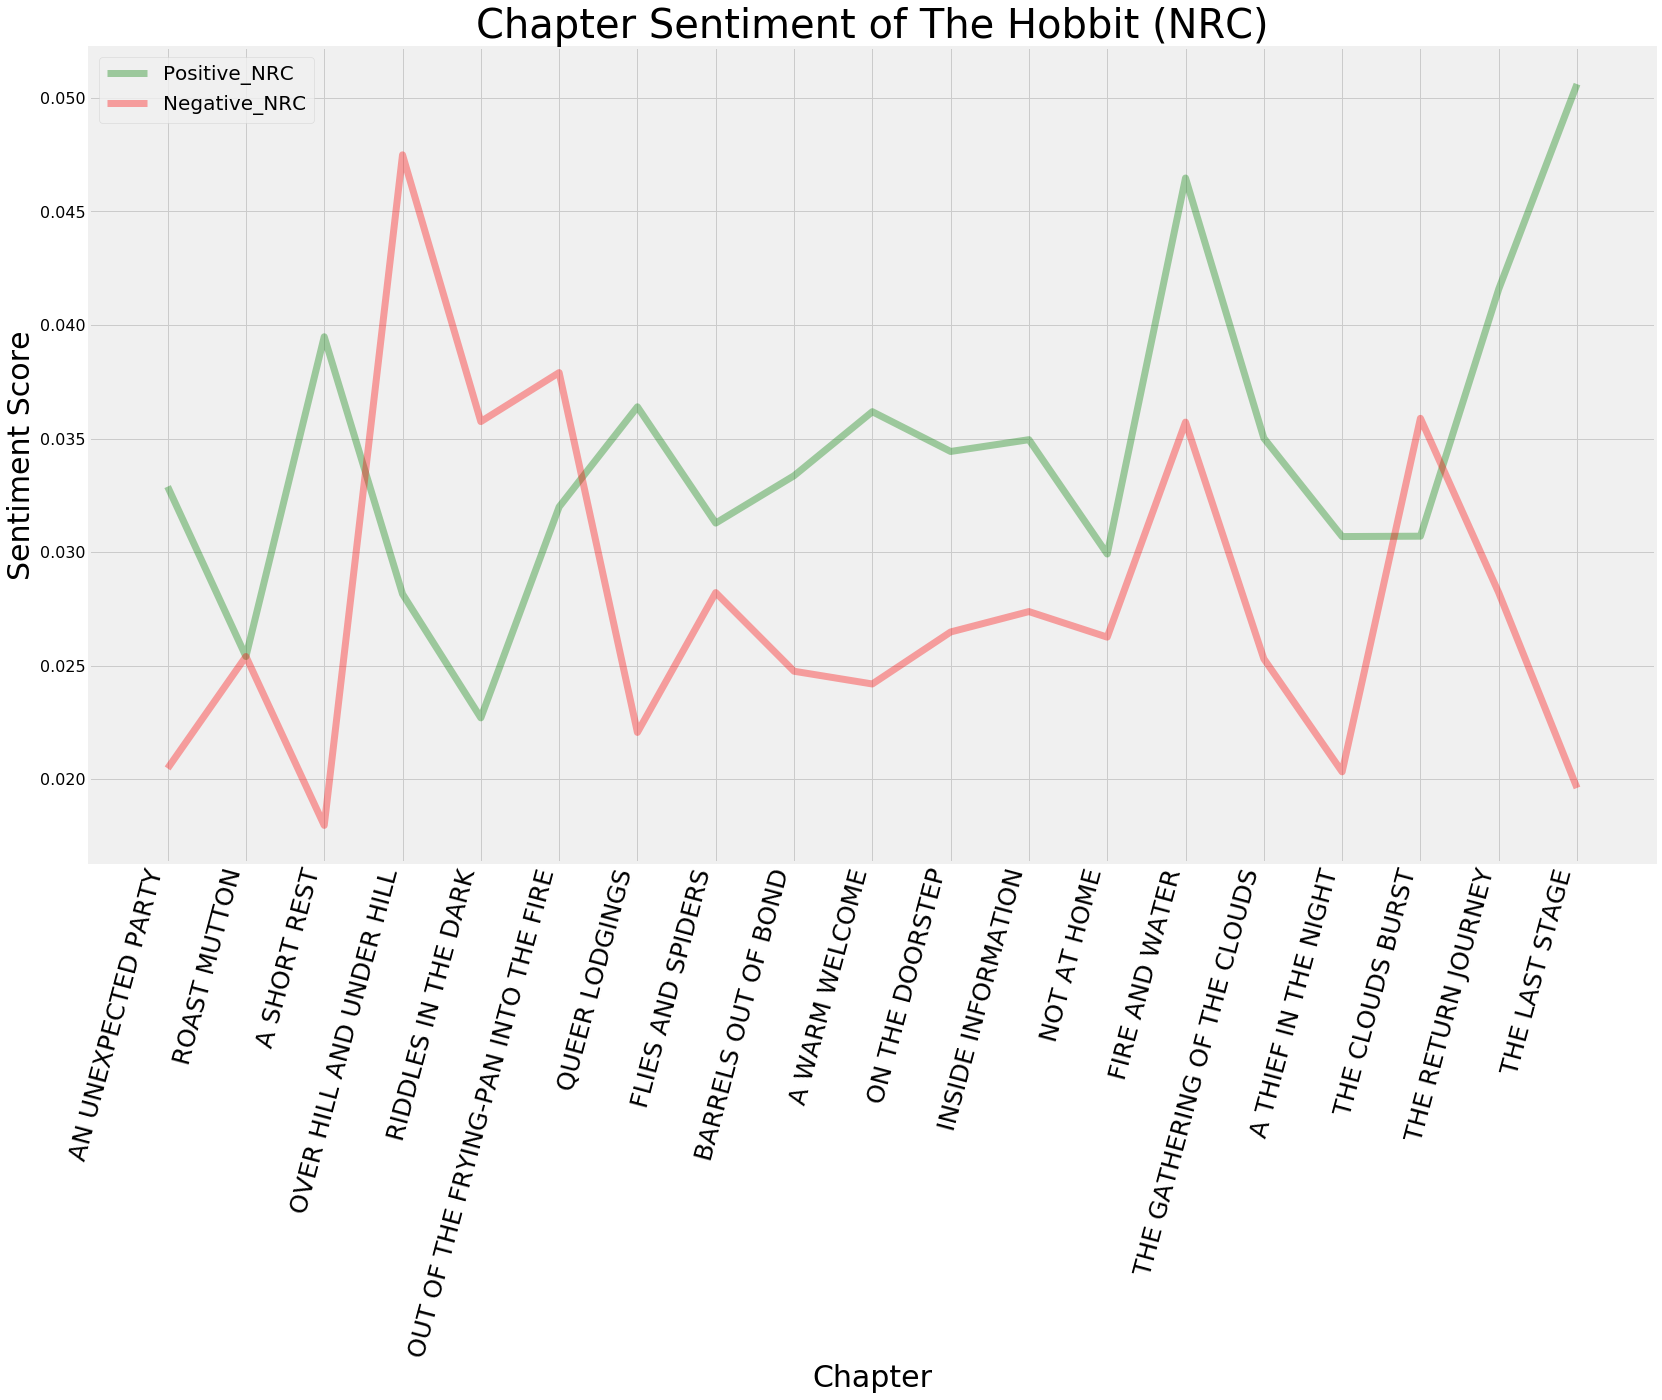

In [15]:
ax = plt.gca()
Hobbit_sentiments.plot(kind='line',x='Chapters', y='Positive_NRC',figsize=(25,15), color='green',
                             alpha=.35, linewidth=7, ax=ax)
Hobbit_sentiments.plot(kind='line',x='Chapters', y='Negative_NRC',figsize=(25,15), color='red',
                             alpha=.35, linewidth=7, ax=ax)
plt.legend(loc='best', fontsize=20)
plt.title('Chapter Sentiment of The Hobbit (NRC)', fontsize=40)
plt.xlim(-1,19)
#plt.ylim(-.2,1)
plt.xlabel('Chapter', fontsize=30)
plt.xticks(np.arange(19), Hobbit_sentiments.Chapters[0:19], rotation=75, ha='right',fontsize=25)
plt.yticks(fontsize=16)
plt.ylabel('Sentiment Score', fontsize=30)
#plt.show()

plt.savefig(r'C:\Users\Nick\Desktop\GitProjects\NLP_projects\The_Hobbit\Hobbit_NRC_PosNeg.png',bbox_inches='tight')



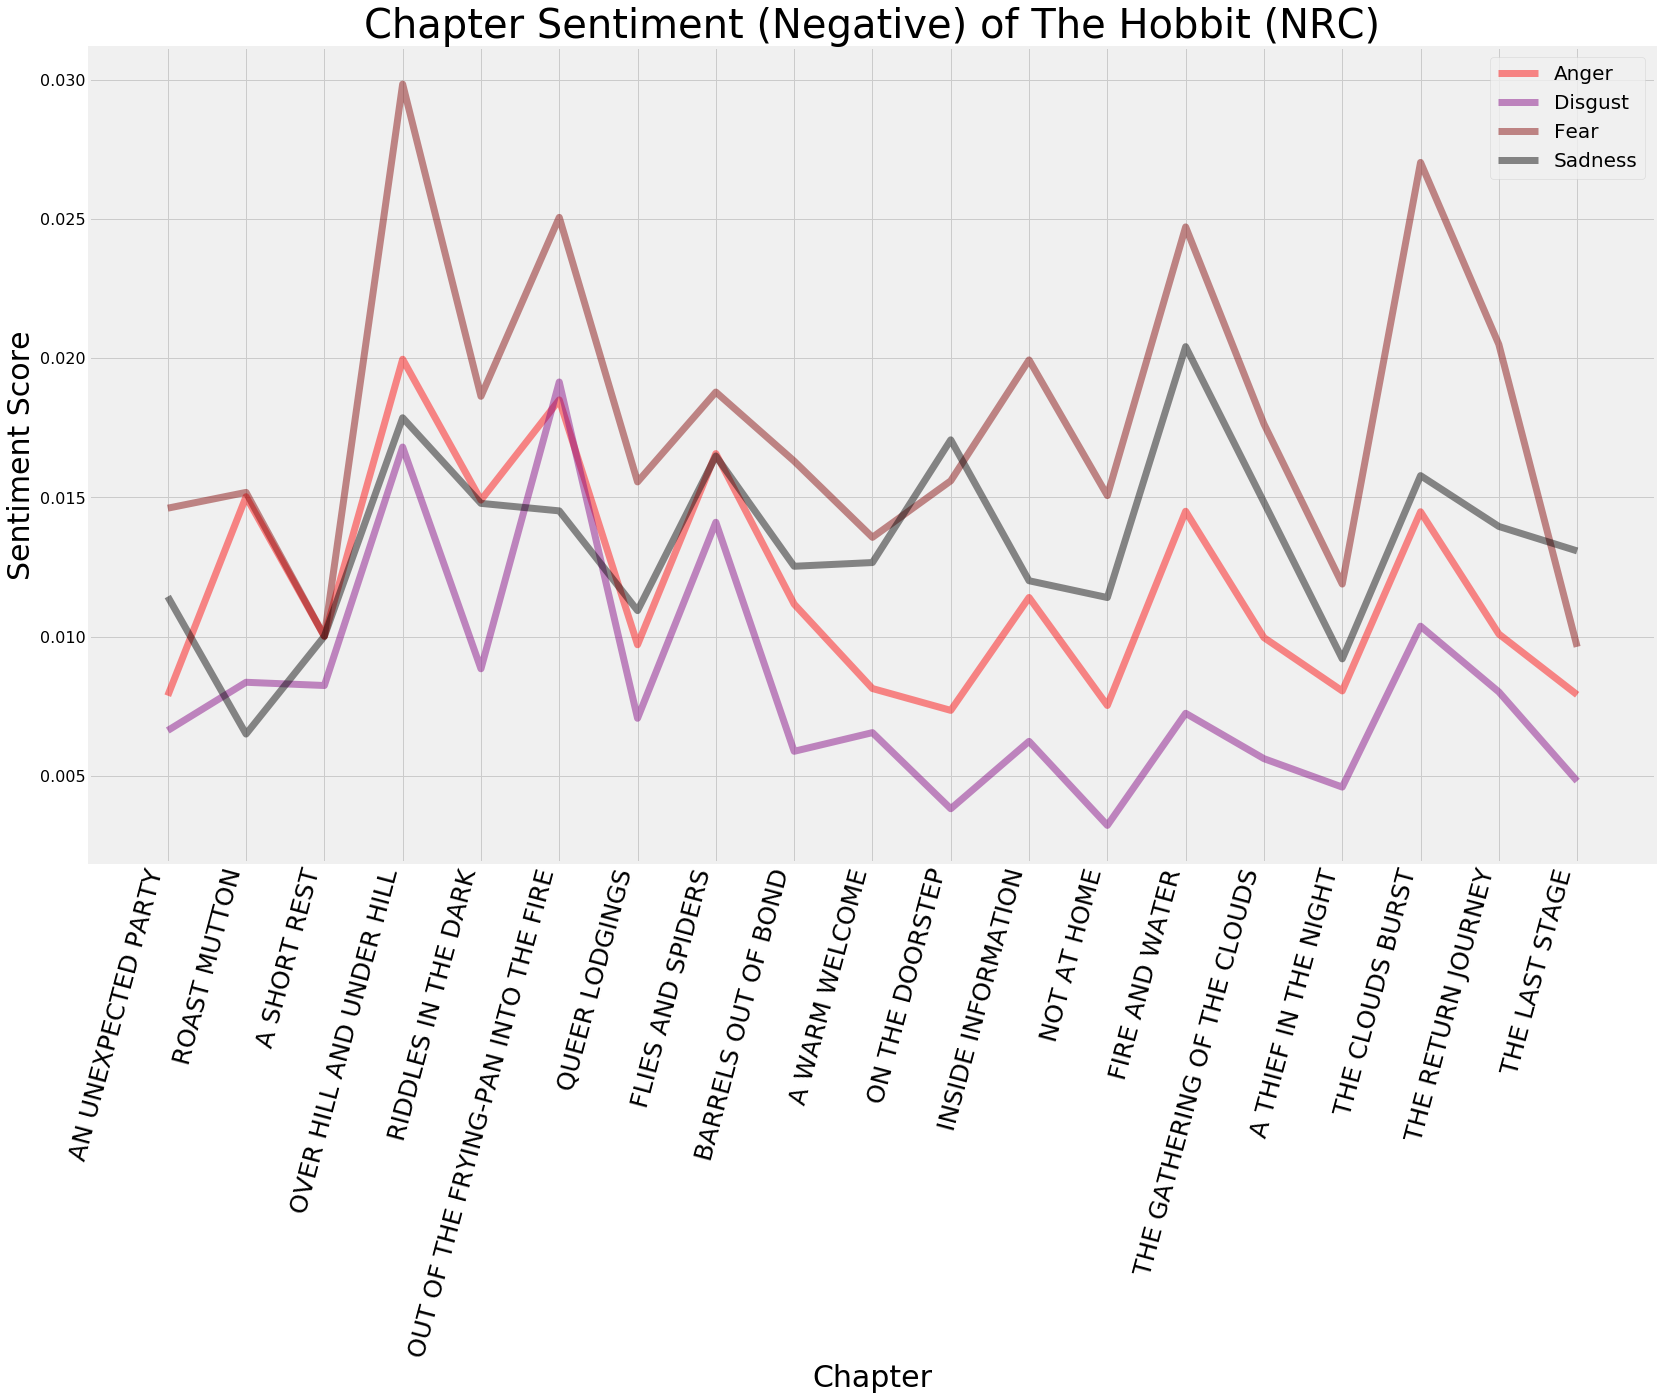

In [16]:
ax = plt.gca()
Hobbit_sentiments.plot(kind='line',x='Chapters', y='Anger',figsize=(25,15), color='red',
                             alpha=.45, linewidth=7, ax=ax)
Hobbit_sentiments.plot(kind='line',x='Chapters', y='Disgust',figsize=(25,15), color='purple',
                             alpha=.45, linewidth=7, ax=ax)
Hobbit_sentiments.plot(kind='line',x='Chapters', y='Fear',figsize=(25,15), color='maroon',
                             alpha=.45, linewidth=7, ax=ax)
Hobbit_sentiments.plot(kind='line',x='Chapters', y='Sadness',figsize=(25,15), color='black',
                             alpha=.45, linewidth=7, ax=ax)
plt.legend(loc='best', fontsize=20)
plt.title('Chapter Sentiment (Negative) of The Hobbit (NRC)', fontsize=40)
plt.xlim(-1,19)
#plt.ylim(-.2,1)
plt.xlabel('Chapter', fontsize=30)
plt.xticks(np.arange(19), Hobbit_sentiments.Chapters[0:19], rotation=75, ha='right',fontsize=25)
plt.yticks(fontsize=16)
plt.ylabel('Sentiment Score', fontsize=30)
#plt.show()

plt.savefig(r'C:\Users\Nick\Desktop\GitProjects\NLP_projects\The_Hobbit\Hobbit_NRC_Neg.png',bbox_inches='tight')

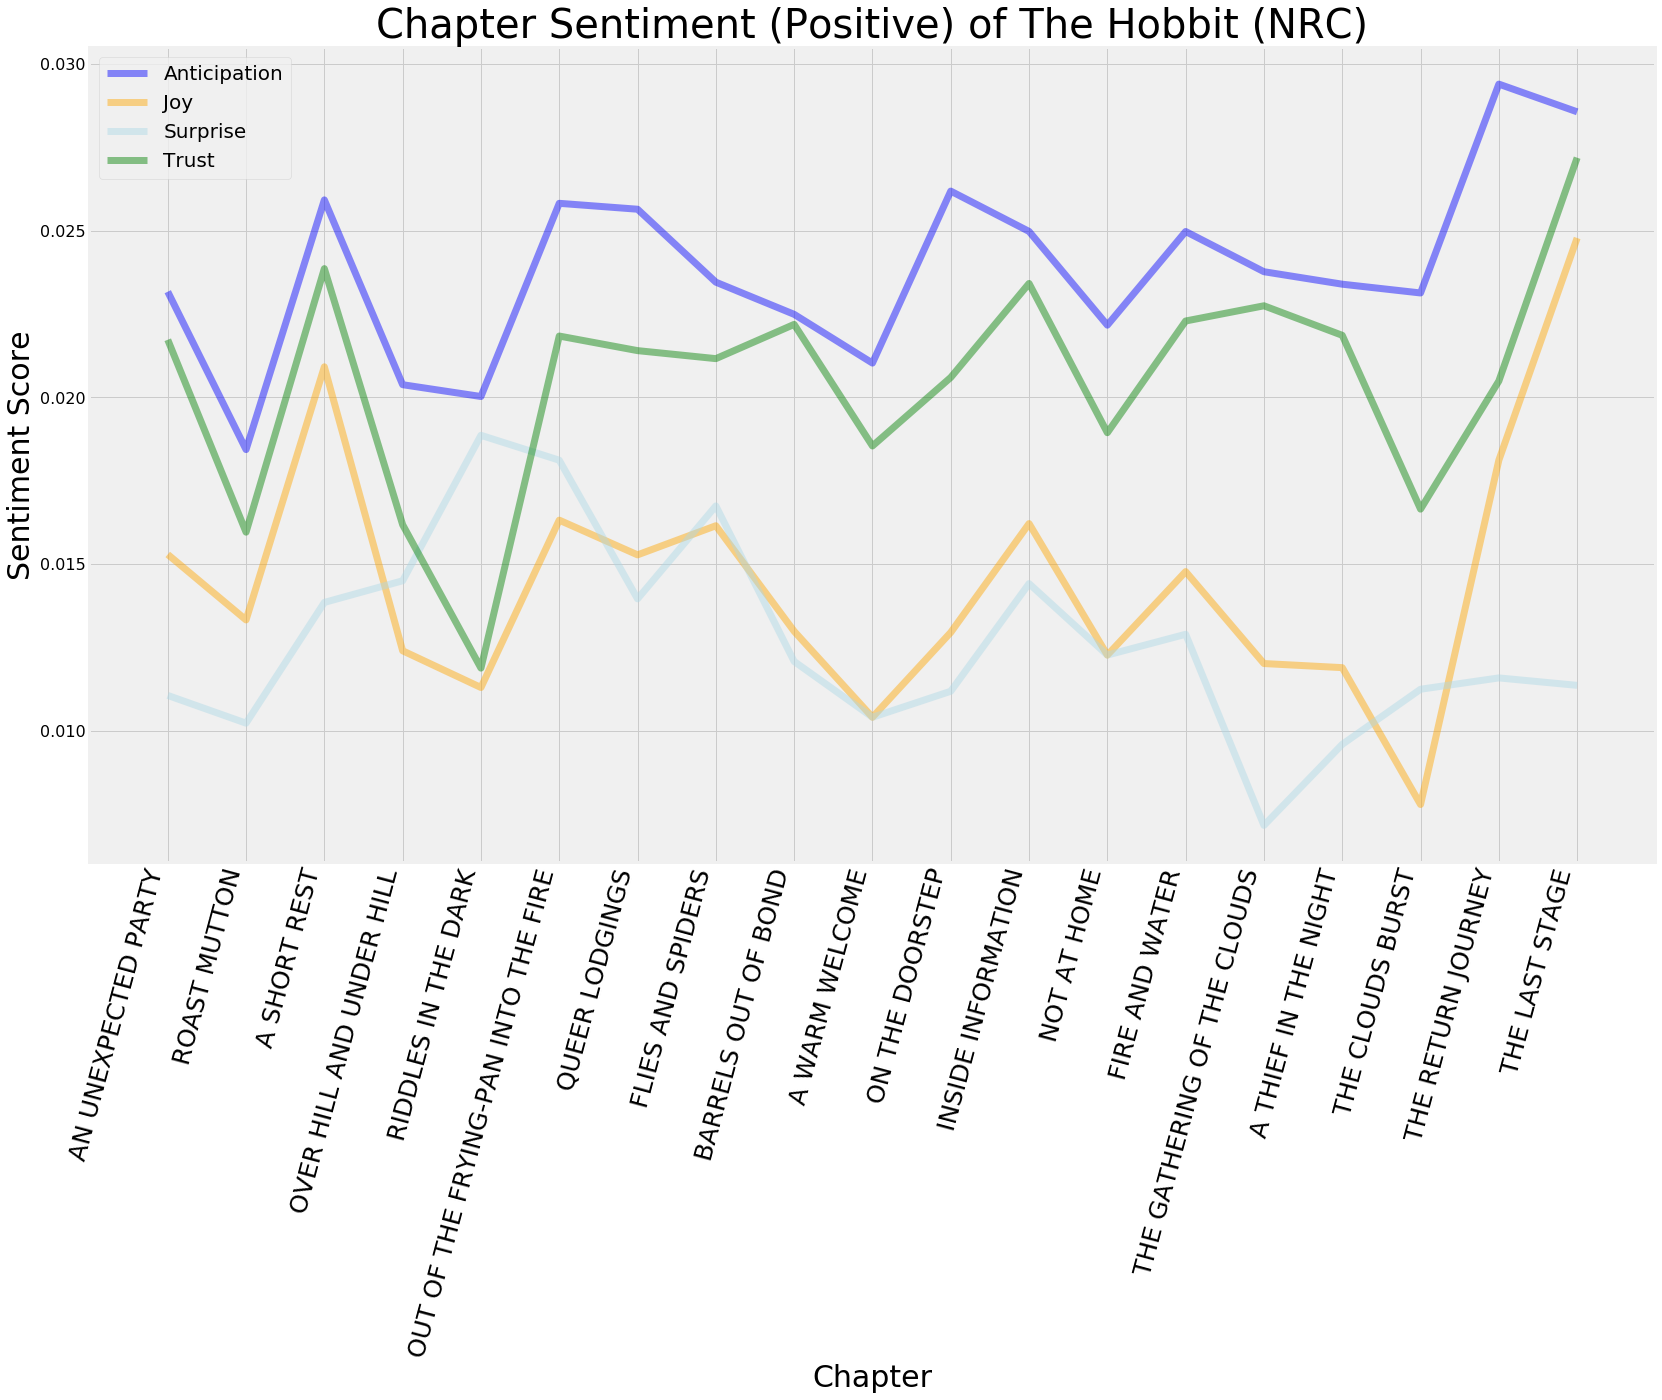

In [17]:
ax = plt.gca()
Hobbit_sentiments.plot(kind='line',x='Chapters', y='Anticipation',figsize=(25,15), color='blue',
                             alpha=.45, linewidth=7, ax=ax)
Hobbit_sentiments.plot(kind='line',x='Chapters', y='Joy',figsize=(25,15), color='orange',
                             alpha=.45, linewidth=7, ax=ax)
Hobbit_sentiments.plot(kind='line',x='Chapters', y='Surprise',figsize=(25,15), color='lightblue',
                             alpha=.45, linewidth=7, ax=ax)
Hobbit_sentiments.plot(kind='line',x='Chapters', y='Trust',figsize=(25,15), color='green',
                             alpha=.45, linewidth=7, ax=ax)
plt.legend(loc='best', fontsize=20)
plt.title('Chapter Sentiment (Positive) of The Hobbit (NRC)', fontsize=40)
plt.xlim(-1,19)
#plt.ylim(-.2,1)
plt.xlabel('Chapter', fontsize=30)
plt.xticks(np.arange(19), Hobbit_sentiments.Chapters[0:19], rotation=75, ha='right',fontsize=25)
plt.yticks(fontsize=16)
plt.ylabel('Sentiment Score', fontsize=30)
#plt.show()

plt.savefig(r'C:\Users\Nick\Desktop\GitProjects\NLP_projects\The_Hobbit\Hobbit_NRC_Pos.png',bbox_inches='tight')

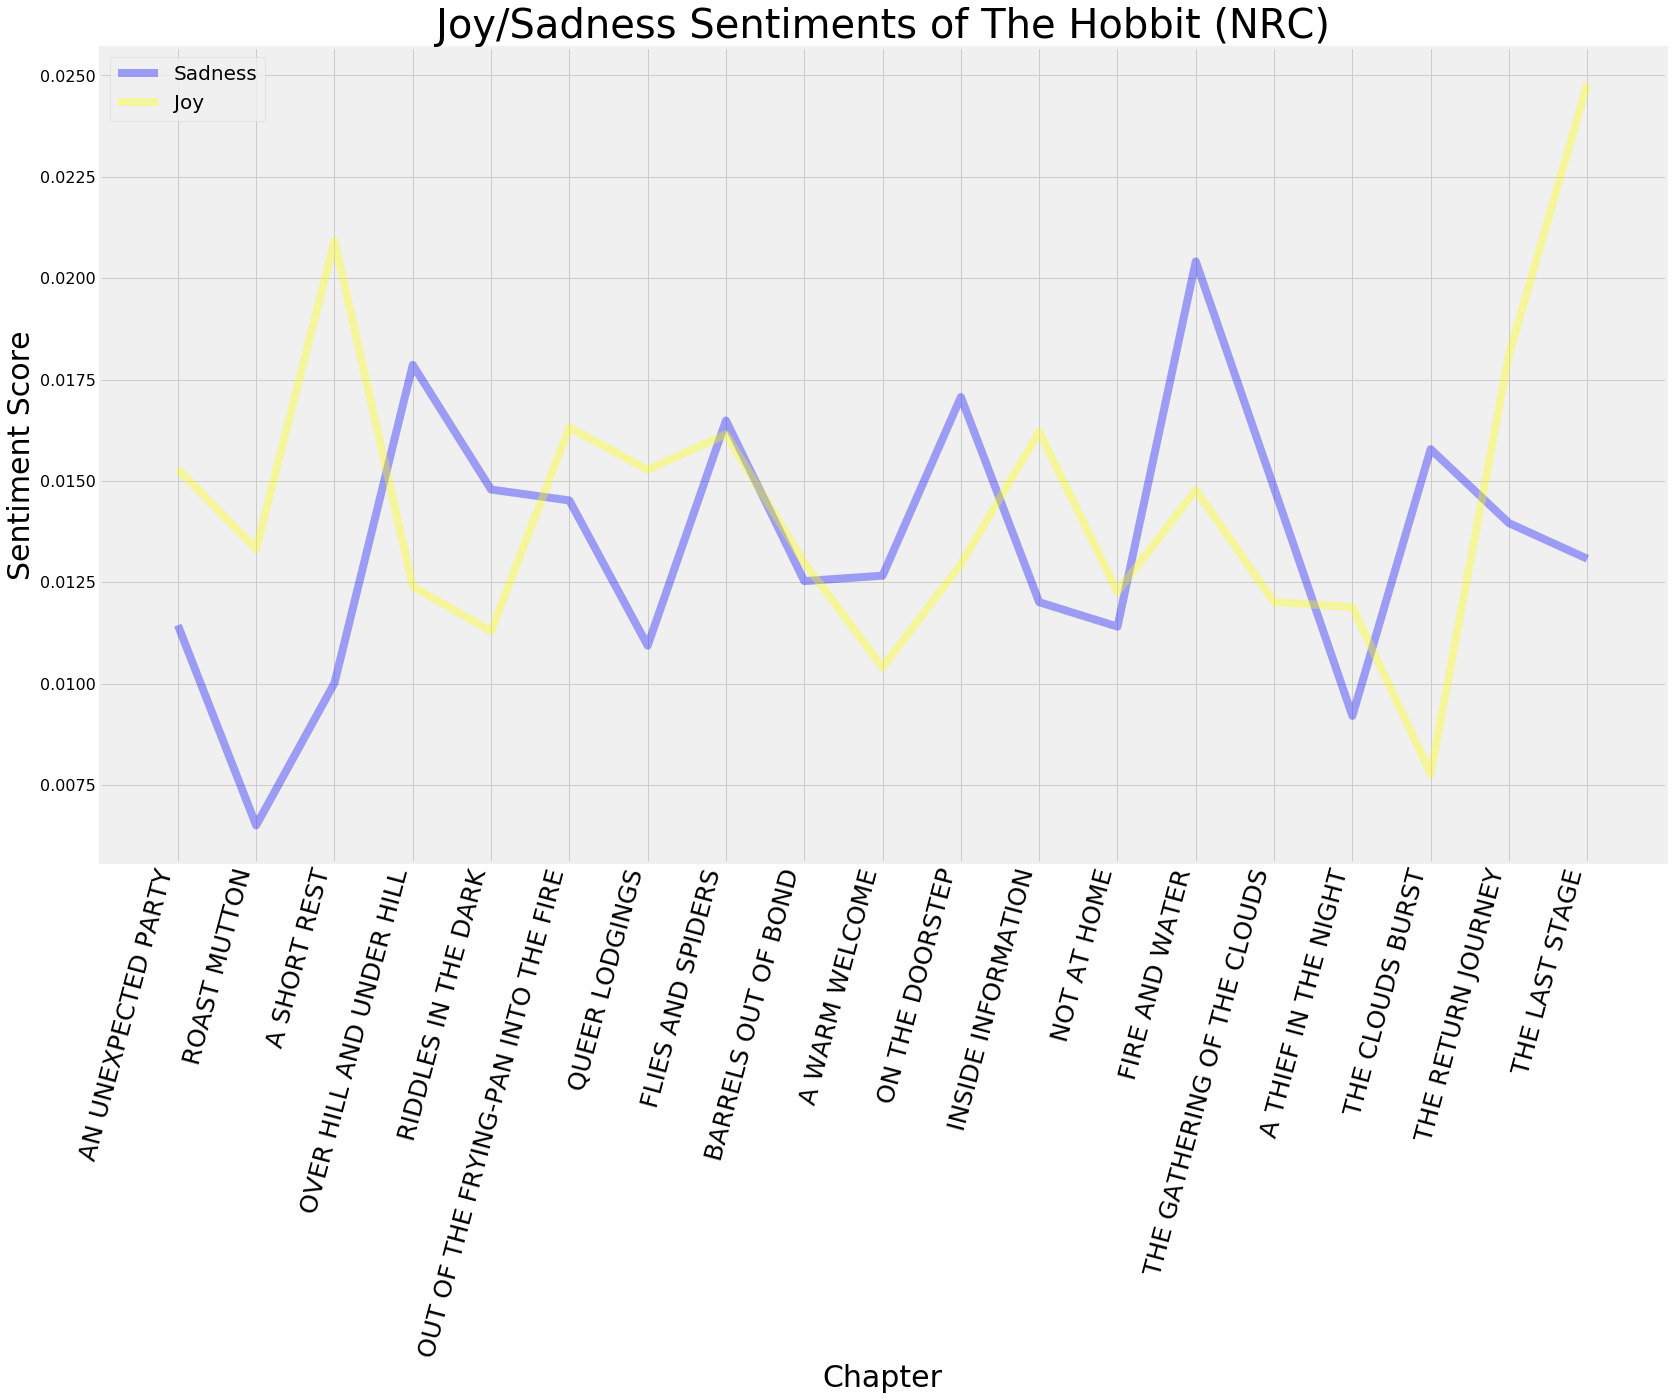

In [18]:
ax = plt.gca()
Hobbit_sentiments.plot(kind='line',x='Chapters', y='Sadness',figsize=(25,15), color='blue',
                             alpha=.35, linewidth=8, ax=ax)
Hobbit_sentiments.plot(kind='line',x='Chapters', y='Joy',figsize=(25,15), color='yellow',
                             alpha=.35, linewidth=8, ax=ax)
plt.legend(loc='best', fontsize=20)
plt.title('Joy/Sadness Sentiments of The Hobbit (NRC)', fontsize=40)
plt.xlim(-1,19)
#plt.ylim(-.2,1)
plt.xlabel('Chapter', fontsize=30)
plt.xticks(np.arange(19), Hobbit_sentiments.Chapters[0:19], rotation=75, ha='right',fontsize=25)
plt.yticks(fontsize=16)
plt.ylabel('Sentiment Score', fontsize=30)
#plt.show()

plt.savefig(r'C:\Users\Nick\Desktop\GitProjects\NLP_projects\The_Hobbit\Hobbit_NRC_JoySad.png',bbox_inches='tight')



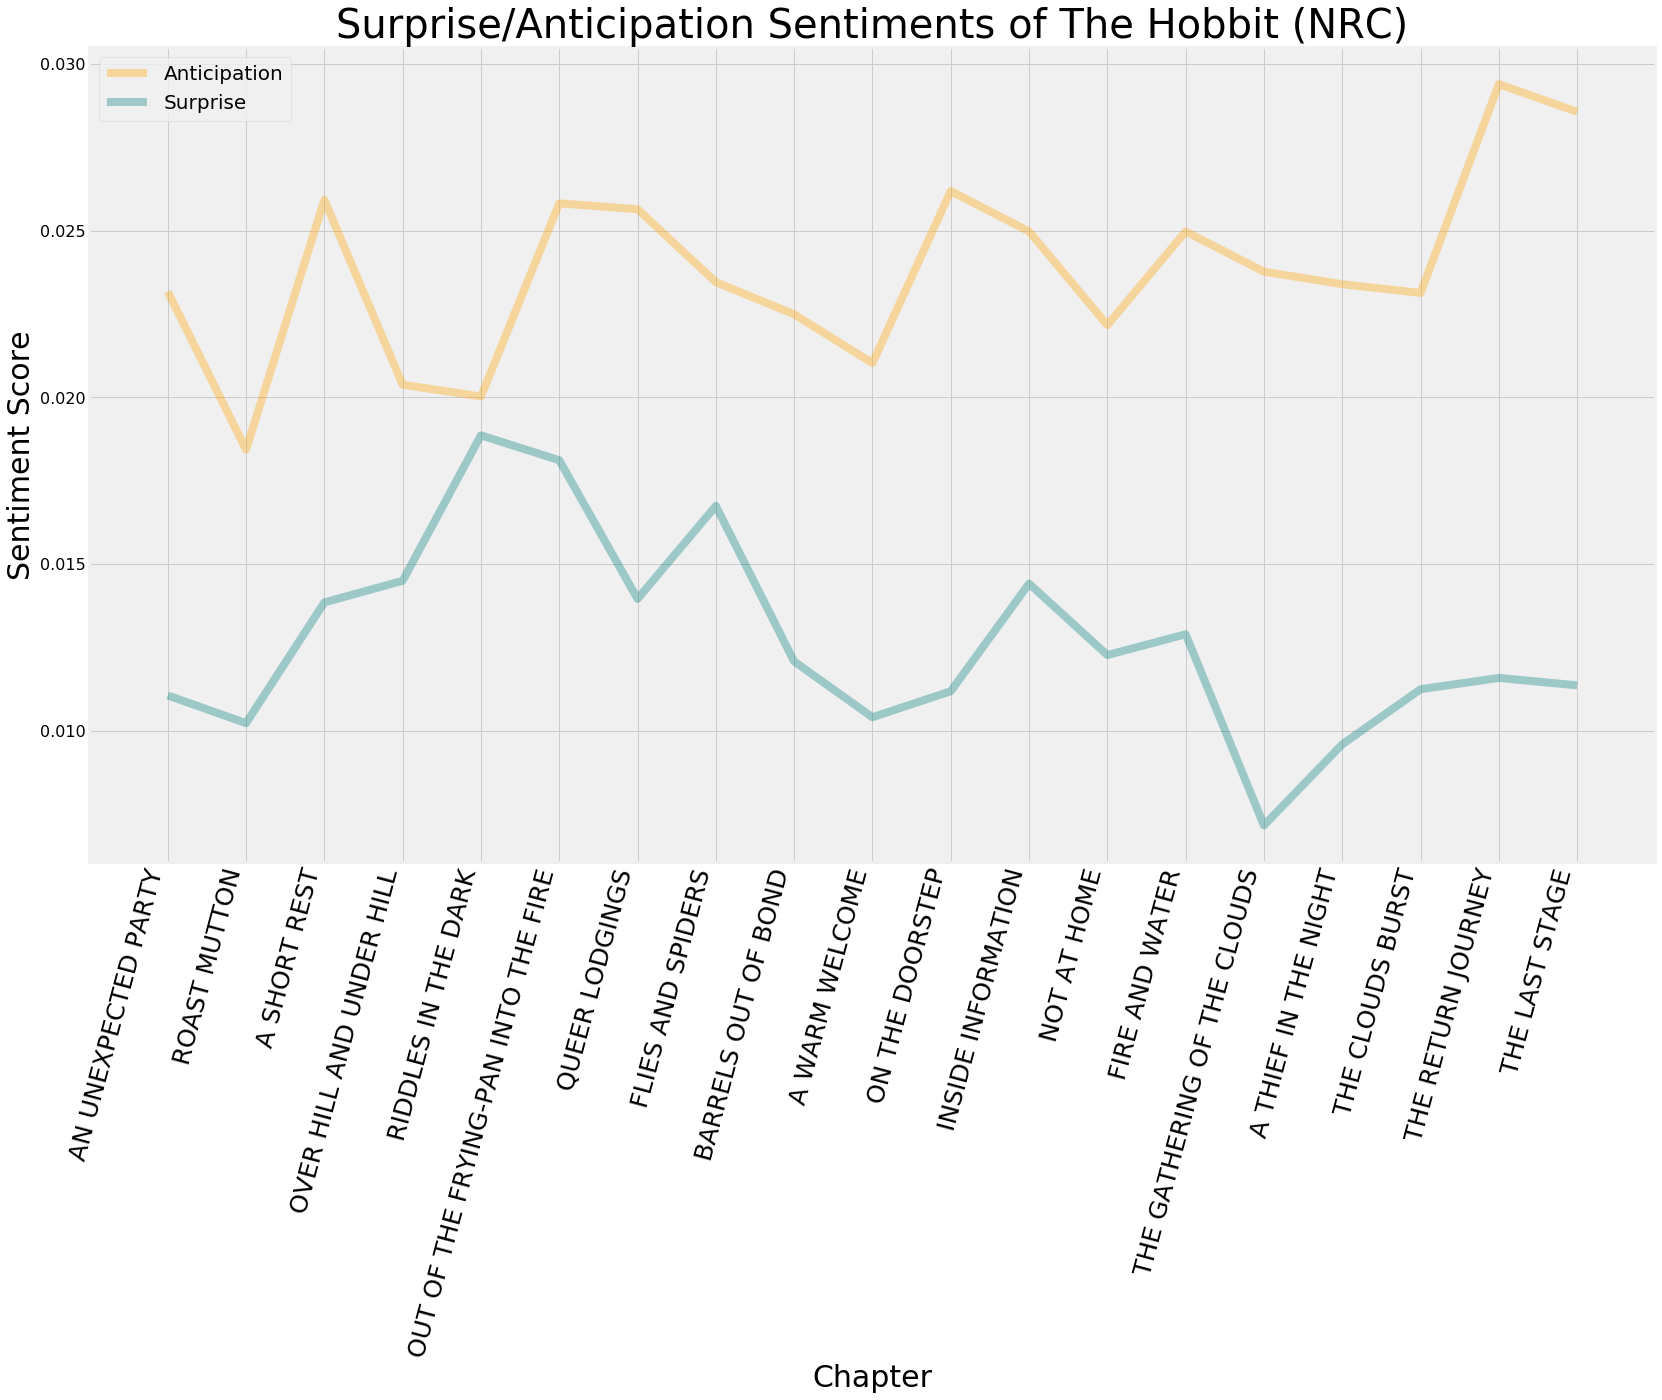

In [19]:
ax = plt.gca()
Hobbit_sentiments.plot(kind='line',x='Chapters', y='Anticipation',figsize=(25,15), color='orange',
                             alpha=.35, linewidth=8, ax=ax)
Hobbit_sentiments.plot(kind='line',x='Chapters', y='Surprise',figsize=(25,15), color='teal',
                             alpha=.35, linewidth=8, ax=ax)
plt.legend(loc='best', fontsize=20)
plt.title('Surprise/Anticipation Sentiments of The Hobbit (NRC)', fontsize=40)
plt.xlim(-1,19)
#plt.ylim(-.2,1)
plt.xlabel('Chapter', fontsize=30)
plt.xticks(np.arange(19), Hobbit_sentiments.Chapters[0:19], rotation=75, ha='right',fontsize=25)
plt.yticks(fontsize=16)
plt.ylabel('Sentiment Score', fontsize=30)
#plt.show()

plt.savefig(r'C:\Users\Nick\Desktop\GitProjects\NLP_projects\The_Hobbit\Hobbit_NRC_SurAnt.png',bbox_inches='tight')

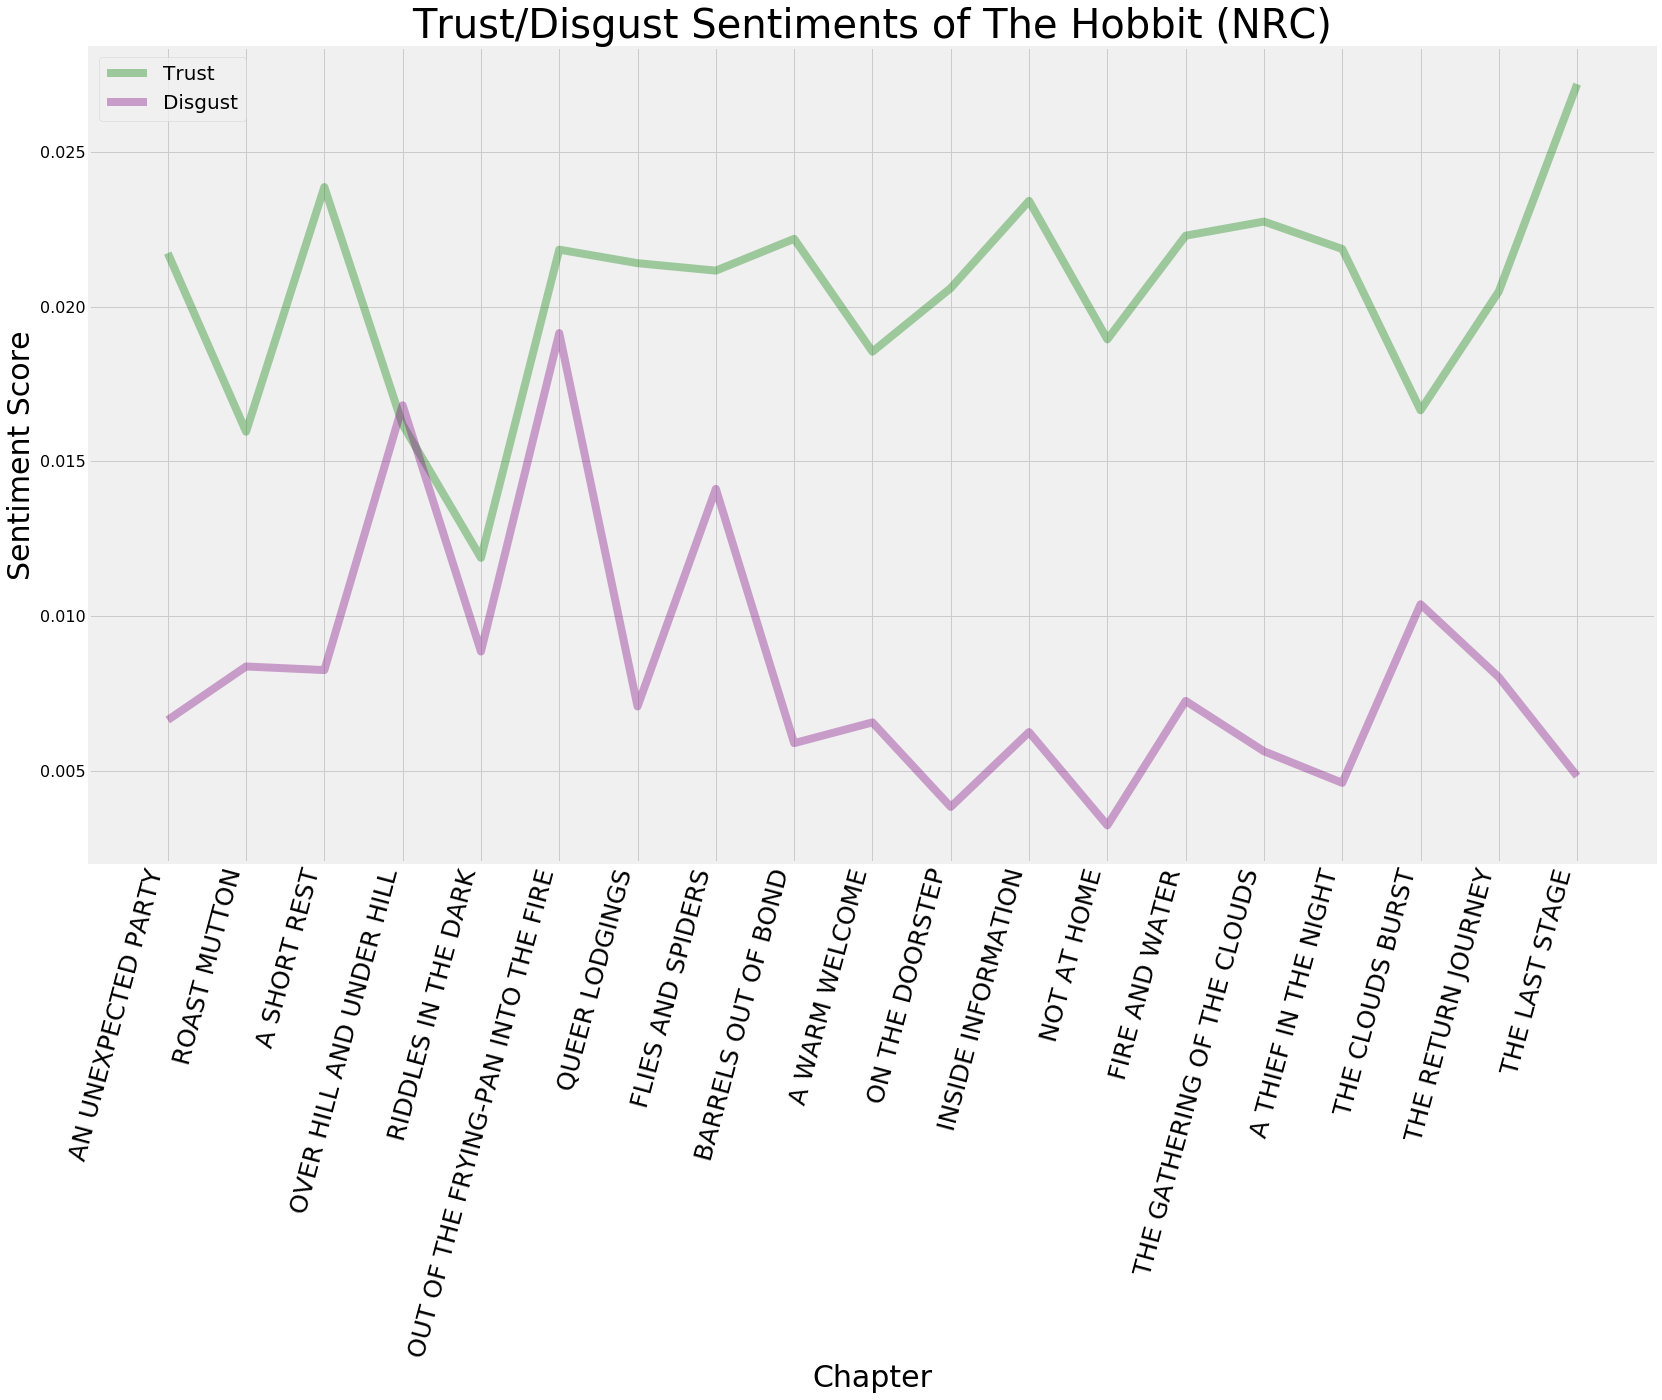

In [20]:
ax = plt.gca()
Hobbit_sentiments.plot(kind='line',x='Chapters', y='Trust',figsize=(25,15), color='green',
                             alpha=.35, linewidth=8, ax=ax)
Hobbit_sentiments.plot(kind='line',x='Chapters', y='Disgust',figsize=(25,15), color='purple',
                             alpha=.35, linewidth=8, ax=ax)
plt.legend(loc='best', fontsize=20)
plt.title('Trust/Disgust Sentiments of The Hobbit (NRC)', fontsize=40)
plt.xlim(-1,19)
#plt.ylim(-.2,1)
plt.xlabel('Chapter', fontsize=30)
plt.xticks(np.arange(19), Hobbit_sentiments.Chapters[0:19], rotation=75, ha='right',fontsize=25)
plt.yticks(fontsize=16)
plt.ylabel('Sentiment Score', fontsize=30)
#plt.show()

plt.savefig(r'C:\Users\Nick\Desktop\GitProjects\NLP_projects\The_Hobbit\Hobbit_NRC_TrustDis.png',bbox_inches='tight')

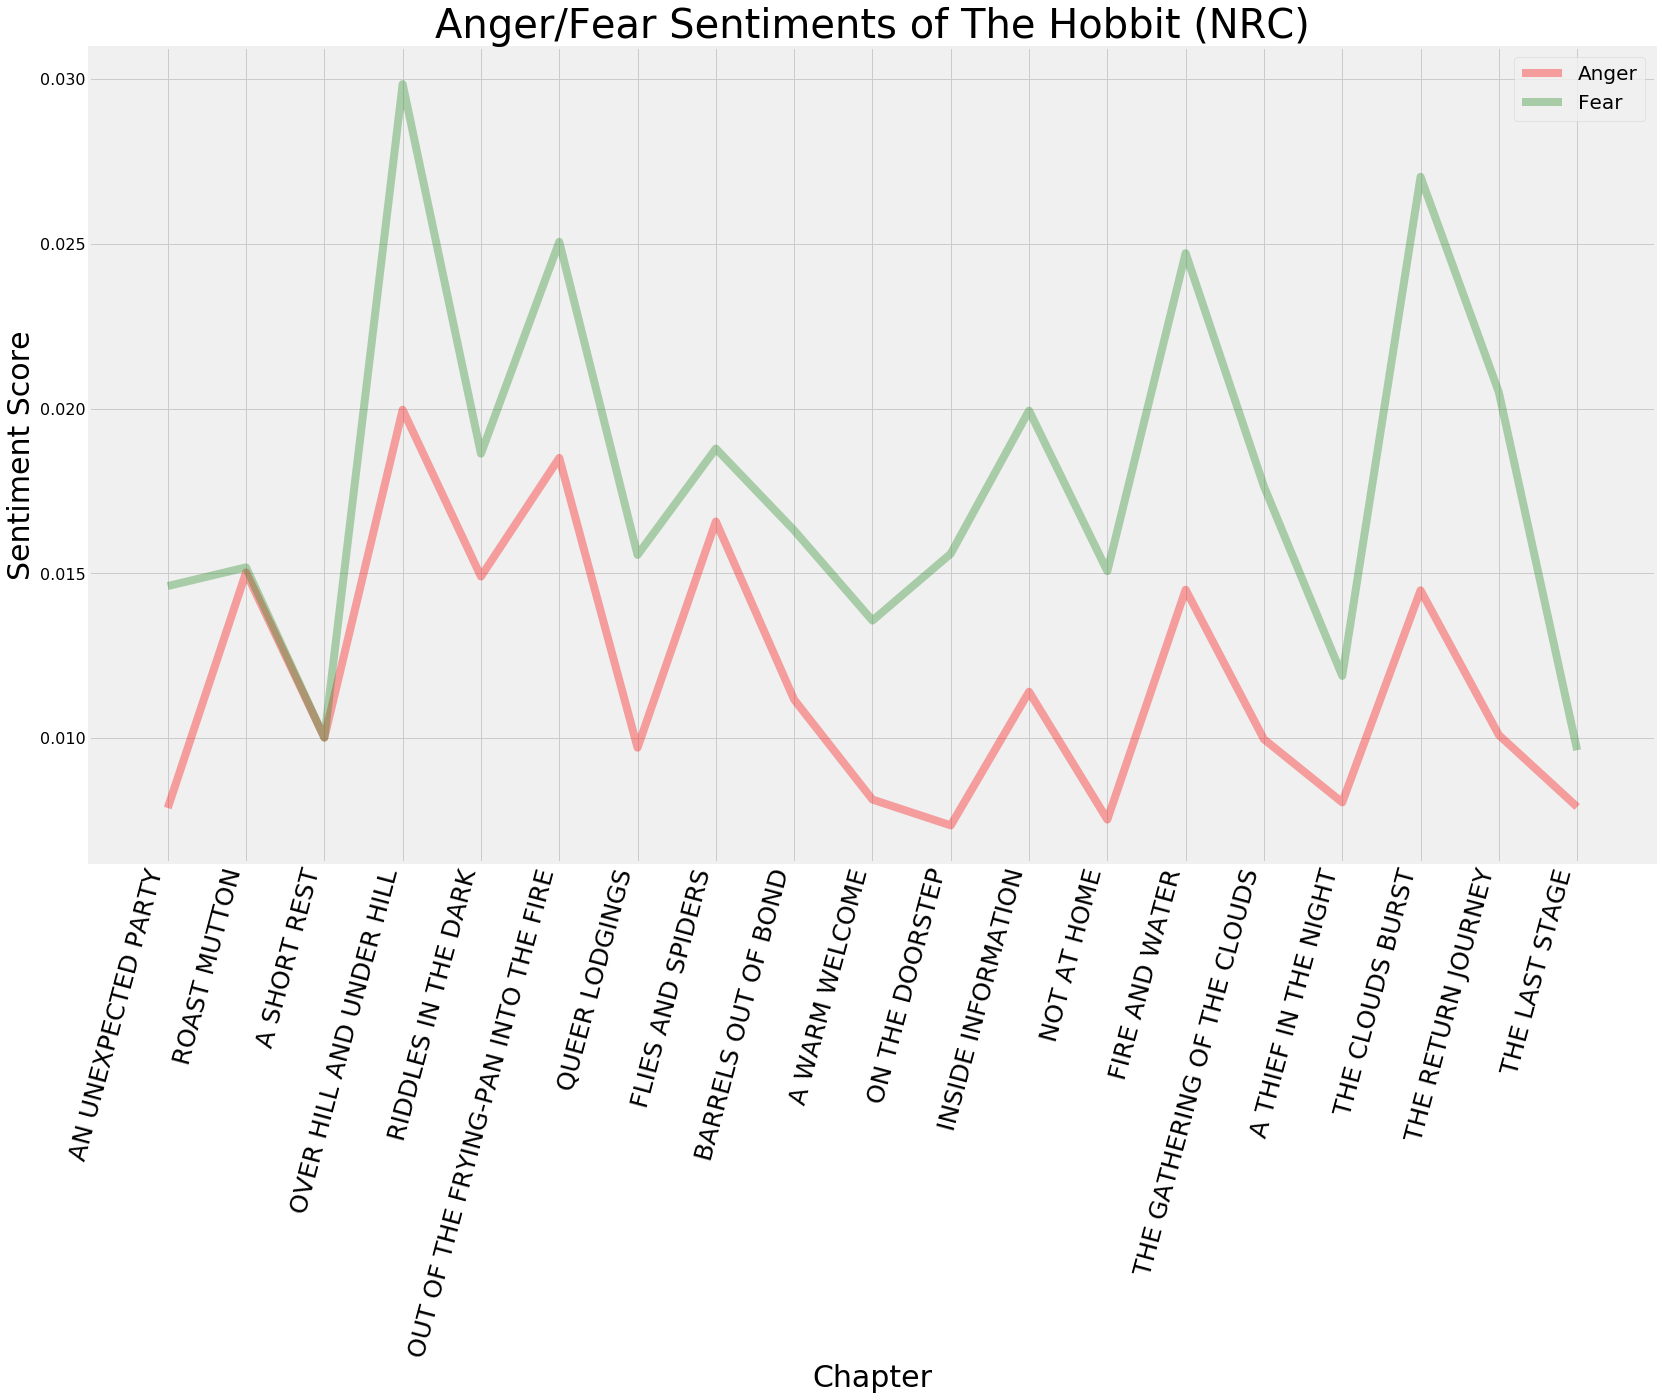

In [22]:
ax = plt.gca()
Hobbit_sentiments.plot(kind='line',x='Chapters', y='Anger',figsize=(25,15), color='red',
                             alpha=.35, linewidth=8, ax=ax)
Hobbit_sentiments.plot(kind='line',x='Chapters', y='Fear',figsize=(25,15), color='forestgreen',
                             alpha=.35, linewidth=8, ax=ax)
plt.legend(loc='best', fontsize=20)
plt.title('Anger/Fear Sentiments of The Hobbit (NRC)', fontsize=40)
plt.xlim(-1,19)
#plt.ylim(-.2,1)
plt.xlabel('Chapter', fontsize=30)
plt.xticks(np.arange(19), Hobbit_sentiments.Chapters[0:19], rotation=75, ha='right',fontsize=25)
plt.yticks(fontsize=16)
plt.ylabel('Sentiment Score', fontsize=30)
#plt.show()

plt.savefig(r'C:\Users\Nick\Desktop\GitProjects\NLP_projects\The_Hobbit\Hobbit_NRC_AngerFear.png',bbox_inches='tight')